In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import time

import random, math
from nsga2 import Solution
from nsga2 import NSGAII

% matplotlib inline

Define test function

In [3]:
class ZDT1Solution(Solution):
    '''
    Solution for the ZDT1 function.
    '''
    def __init__(self):
        '''
        Constructor.
        '''
        Solution.__init__(self, 2)
        
        self.xmin = 0.0
        self.xmax = 1.0
        
        for _ in range(30):
            self.attributes.append(random.random())
        
        self.evaluate_solution()
        
    def evaluate_solution(self):
        '''
        Implementation of method evaluate_solution() for ZDT1 function.
        '''
        self.objectives[0] = self.attributes[0]
        
        sum = 0.0
        for i in range(1, 30):
            sum += self.attributes[i]
            
        g = 1.0 + (9.0 * (sum / 29))
        
        self.objectives[1] = g * (1.0 - math.sqrt(self.attributes[0] / g))
        
    def crossover(self, other):
        '''
        Crossover of ZDT1 solutions.
        '''
        child_solution = ZDT1Solution()
        
        for i in range(30):
            child_solution.attributes[i] = math.sqrt(self.attributes[i] * other.attributes[i])
        
        return child_solution
    
    def mutate(self):
        '''
        Mutation of ZDT1 solution.
        '''
        self.attributes[random.randint(0, 29)] = random.random()

In [8]:
nsga2 = NSGAII(2, 0.1, 1.0)

P = []

n_population = 50
n_iterations = 20

for i in range(n_population):
    P.append(ZDT1Solution())
    
Q = nsga2.initialise(P)

Ps = []
t0 = time.time()
for ii in range(n_iterations):
    print('Iteration', ii, '- Elapsed time:', time.time() - t0)
    P, Q = nsga2.generate(P, Q, n_population, n_iterations)
    Ps.append(copy.deepcopy(P))

Iteration 0 - Elapsed time: 0.0
Iteration 1 - Elapsed time: 0.005514621734619141
Iteration 2 - Elapsed time: 0.02005290985107422
Iteration 3 - Elapsed time: 0.03409099578857422
Iteration 4 - Elapsed time: 0.04913067817687988
Iteration 5 - Elapsed time: 0.06366944313049316
Iteration 6 - Elapsed time: 0.07870888710021973
Iteration 7 - Elapsed time: 0.09324765205383301
Iteration 8 - Elapsed time: 0.10828757286071777
Iteration 9 - Elapsed time: 0.12332773208618164
Iteration 10 - Elapsed time: 0.13786697387695312
Iteration 11 - Elapsed time: 0.152907133102417
Iteration 12 - Elapsed time: 0.16844797134399414
Iteration 13 - Elapsed time: 0.1839895248413086
Iteration 14 - Elapsed time: 0.19953036308288574
Iteration 15 - Elapsed time: 0.2150716781616211
Iteration 16 - Elapsed time: 0.23011159896850586
Iteration 17 - Elapsed time: 0.24465036392211914
Iteration 18 - Elapsed time: 0.260692834854126
Iteration 19 - Elapsed time: 0.27523183822631836


Visualise final generation 

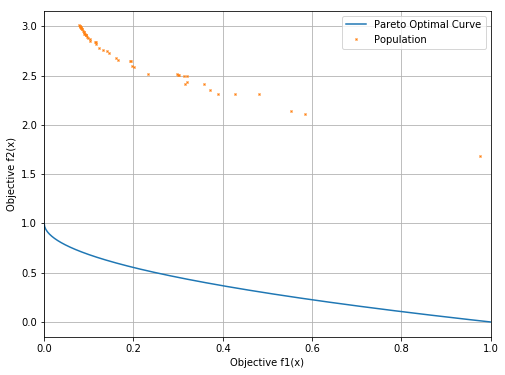

In [9]:
plt.figure(figsize = (8, 6))

f1 = np.linspace(0, 1, 1000)
f2 = 1.0 - np.sqrt(f1)
plt.plot(f1, f2, label = 'Pareto Optimal Curve')

plt.plot([p.objectives[0] for p in Ps[-1]], 
         [p.objectives[1] for p in Ps[-1]],
         'x', 
         markersize = 2,
         label = 'Population')

plt.ylabel('Objective f2(x)')
plt.xlabel('Objective f1(x)')
plt.grid(which = 'both')
plt.legend()
plt.xlim([0, 1])
plt.show()